In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import os
import time

NUM_EPOCHS = 1500 # Number of training epochs

PH = 5

In [2]:
def readData(filePath) :
    x_data = []
    y_data = []
    allList = []
    newPointx=[]
    newPointy=[]
    
    with open(filePath, 'r') as f:
        for line in f:
            allList.append(float(line))

    df = pd.Series(allList) #일차원 리스트를 pandas 데이터프레임화

    while True:
        for i in df[0:7]: 
            newPointx.append(float(i)) #데이터프레임 앞의 7개를 newPointx 리스트에 삽입
        newPointy.append(float(df[6 + (PH/5)])) #데이터프레임 그 다음(10번째)을 newPointy 리스트에 삽입

        x_data.append(newPointx) #x_data 리스트에 newPointx 리스트를 삽입 (x_data는 array of array가 됨)
        y_data.append(newPointy) #위와 동일

        newPointx=[] #다음 반복을 위해 newPointx,y를 빈 리스트로 초기화
        newPointy=[]
        df=df.shift(-1) #데이터프레임 왼 쪽으로 1칸 쉬프트
        if(math.isnan(df[6 + (PH/5)])): #만약 8번째 데이터프레임이 NaN(Not a Number) 라면 반복 중지
            break

    #배열 갯수 보정작업
    #데이터의 개수가 항상 8의 배수가 아니기 때문에 x_data의 마지막 원소 리스트가 항상 7개가 아닐수 있고
    #y_data의 마지막 원소 리스트가 항상 1개가 아닐 수 있기 때문에 
    #빈 칸들은 0으로 채워주기 위한 작업
    if(len(x_data[-1]) != 7):
       xSize = 7-len(x_data[-1])
       for i in range(xSize):
           x_data[-1].append(0.0)
    if(len(y_data[-1])!=1):
       y_data[-1].append(0.0)  
    
    data = [x_data, y_data]
    return data;

In [3]:
x = tf.placeholder(tf.float32, [None, 7], name='x') # Input placeholder
y_desired = tf.placeholder(tf.float32, [None, 1], name='y_desired') # Desired output placeholder

In [4]:
start_time = time.time()

trainFileName = [85655,209019,365303,485709,553778,573060,579883,822250,839654,885633,895646,920087]
testFileName = [1007000,1185429,1393413,3008387]

gitTrainFileName = []
gitTestFileName = []


trainData_in_list=[]
trainData_out_list=[]

testData_in_list=[]
testData_out_list=[]

#git_input_data 폴더 밑에 12_test.csv, 12_train.csv 처럼 파일 있으니, 이 이름들을 배열에 저장시켜야 나중에 편해짐
gitFileList = os.listdir("git_input_data")
for fn in gitFileList:
    if fn.find("test") != -1: #파일이름에 test가 들어간다면
        gitTestFileName.append(fn)
    elif fn.find("train") != -1: #파일 이름에 train이 들어간다면
        gitTrainFileName.append(fn)

#학습용 데이터 전체 읽기 (실제 데이터)
for fn in trainFileName:
    inData, outData = readData("input_data_ver2/"+str(fn)+".csv")
    trainData_in_list.append(inData)
    trainData_out_list.append(outData)

print("trainData_in_list_len: "+str(len(trainData_in_list)))
print("trainData_out_list_len: "+str(len(trainData_out_list)))

#시험용 데이터 전체 읽기 (실제 데이터)
for fn in testFileName:
    inData, outData = readData("input_data_ver2/"+str(fn)+".csv")
    testData_in_list.append(inData)
    testData_out_list.append(outData)
    
print("testData_in_list_len: "+str(len(testData_in_list)))
print("testData_out_list_len: "+str(len(testData_in_list)))

    
#학습용 데이터 전체 읽기 (git 데이터)
for fn in gitTrainFileName:
    print(str(fn))
    inData, outData = readData("git_input_data/"+str(fn))
    trainData_in_list.append(inData)
    trainData_out_list.append(outData)

print("trainData_in_list_len: "+str(len(trainData_in_list)))
print("trainData_out_list_len: "+str(len(trainData_out_list)))

#시험용 데이터 전체 읽기 (git 데이터)
for fn in gitTestFileName:
    print(str(fn))
    inData, outData = readData("git_input_data/"+str(fn))
    testData_in_list.append(inData)
    testData_out_list.append(outData)

print("testData_in_list_len: "+str(len(testData_in_list)))
print("testData_out_list_len: "+str(len(testData_in_list)))
    
end_time = time.time()

print("File I/O elapsed time: "+str(end_time-start_time))

trainData_in_list_len: 12
trainData_out_list_len: 12
testData_in_list_len: 4
testData_out_list_len: 4
18_train.csv
149_train.csv
135_train.csv
160_train.csv
109_train.csv
132_train.csv
164_train.csv
147_train.csv
117_train.csv
108_train.csv
146_train.csv
142_train.csv
176_train.csv
111_train.csv
150_train.csv
174_train.csv
172_train.csv
118_train.csv
162_train.csv
140_train.csv
122_train.csv
175_train.csv
173_train.csv
12_train.csv
15_train.csv
136_train.csv
121_train.csv
105_train.csv
151_train.csv
123_train.csv
188_train.csv
131_train.csv
133_train.csv
180_train.csv
17_train.csv
155_train.csv
100_train.csv
138_train.csv
139_train.csv
145_train.csv
178_train.csv
170_train.csv
13_train.csv
trainData_in_list_len: 55
trainData_out_list_len: 55
131_test.csv
15_test.csv
164_test.csv
172_test.csv
118_test.csv
108_test.csv
150_test.csv
109_test.csv
174_test.csv
160_test.csv
100_test.csv
178_test.csv
138_test.csv
117_test.csv
133_test.csv
147_test.csv
132_test.csv
121_test.csv
142_test.csv
16

In [6]:
# Weights from inputs to first hidden layer (15 nodes):
Wh1 = tf.Variable(tf.random_uniform([7, 15], minval = -1, maxval = 1, dtype = tf.float32))
# Bias for first hidden layer:
bh1 = tf.Variable(tf.zeros([1, 15]))

# Weights from first hidden layer to second (15 nodes):
Wh2 = tf.Variable(tf.random_uniform([15, 15], minval = -1, maxval = 1, dtype = tf.float32))
# Bias for second hidden layer:
bh2 = tf.Variable(tf.zeros([1, 15])) # One bias input for each of the 10 output nodes

# Weights from second hidden layer to output layer (1 node):
Wo = tf.Variable(tf.random_uniform([15, 1], minval = -1, maxval = 1, dtype = tf.float32))
# Bias to output node:
bo = tf.Variable(tf.zeros([1, 1]))

# Nodes have no output function (they simply output their activation):
h1 = tf.add(tf.matmul(x, Wh1), bh1) # Hidden layer 1 output
h2 = tf.add(tf.matmul(h1, Wh2), bh2) # Hidden layer 2 output
prediction = tf.add(tf.matmul(h2, Wo), bo) # Network output

In [7]:
# Error function to be minimized is the mean square error:
loss = tf.reduce_mean(tf.square(prediction - y_desired))

In [8]:
# Define training algorithm (Adam Optimizer):
# Note: AdamOptimizer produced better results than the GradientDescentOptimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

In [9]:
start_time = time.time()

errors = []
sess = tf.InteractiveSession()
#tf.initialize_all_variables().run() 폐기
sess.run(tf.global_variables_initializer())


#모델 복구 코드
new_saver = tf.train.import_meta_graph('savedModel/real+git+model+ph5/original_plus_git.ckpt.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('savedModel/real+git+model+ph5/'))

print("DONE")
end_time = time.time()

print("ML elapsed time: "+str(end_time-start_time))

INFO:tensorflow:Restoring parameters from savedModel/real+git+model+ph5/original_plus_git.ckpt
DONE
ML elapsed time: 0.5708878040313721


Patient: 1007000, RMSE: 551.431647754778



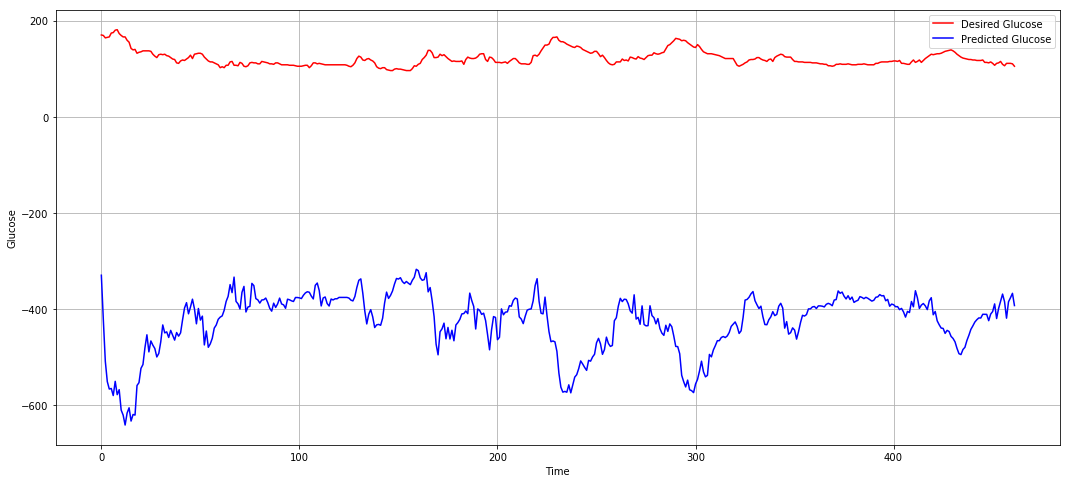

Patient: 1185429, RMSE: 898.268843918303



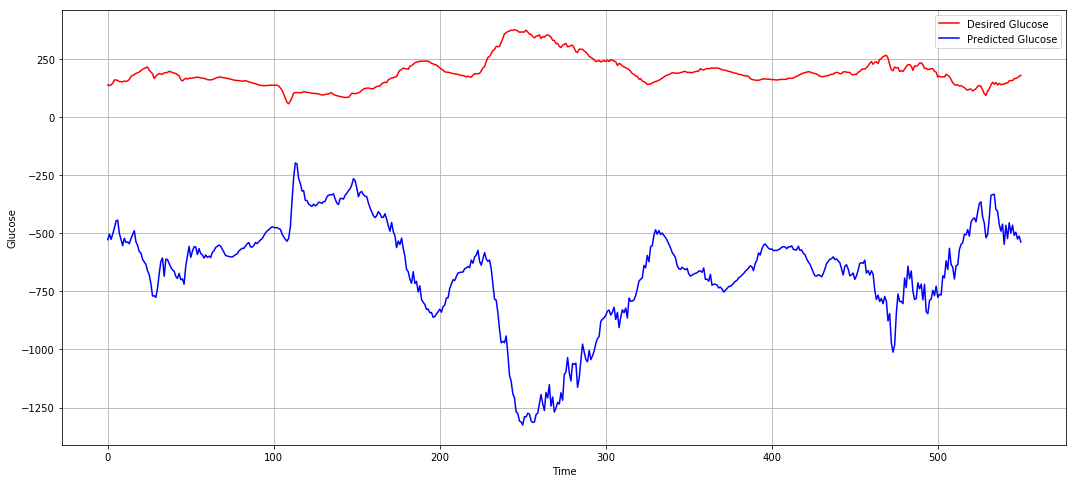

Patient: 1393413, RMSE: 892.8663599172693



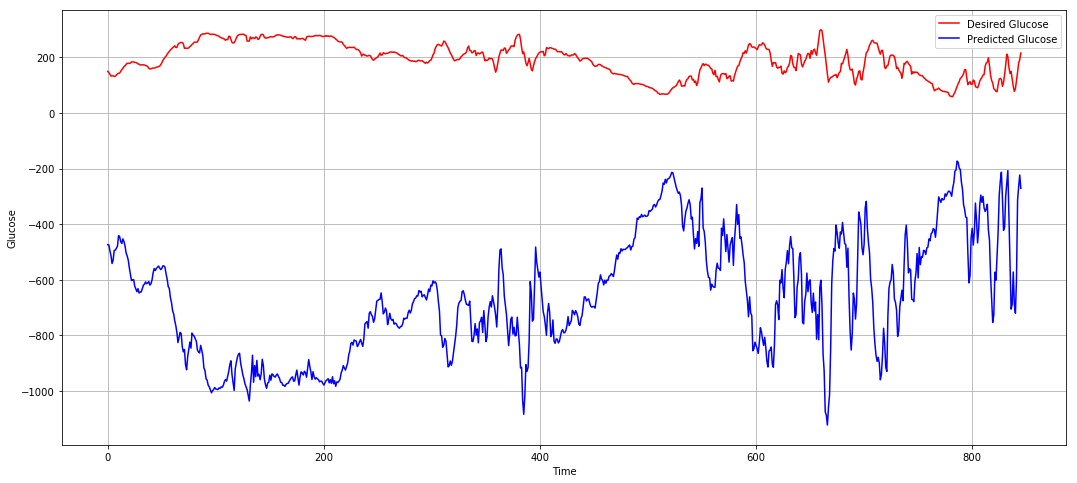

Patient: 3008387, RMSE: 338.0385215862866



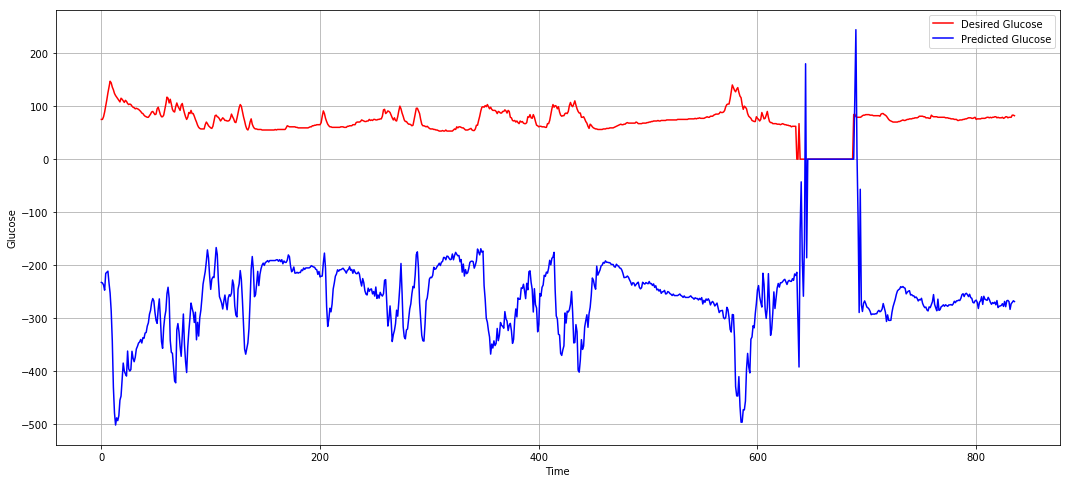

Patient: 131_test.csv, RMSE: 774.7137973954281



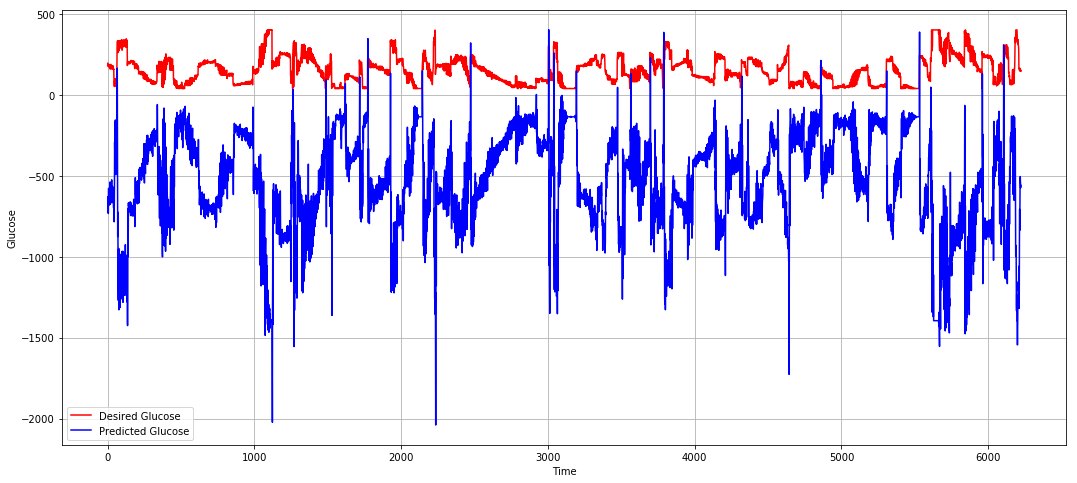

Patient: 15_test.csv, RMSE: 828.8388650696314



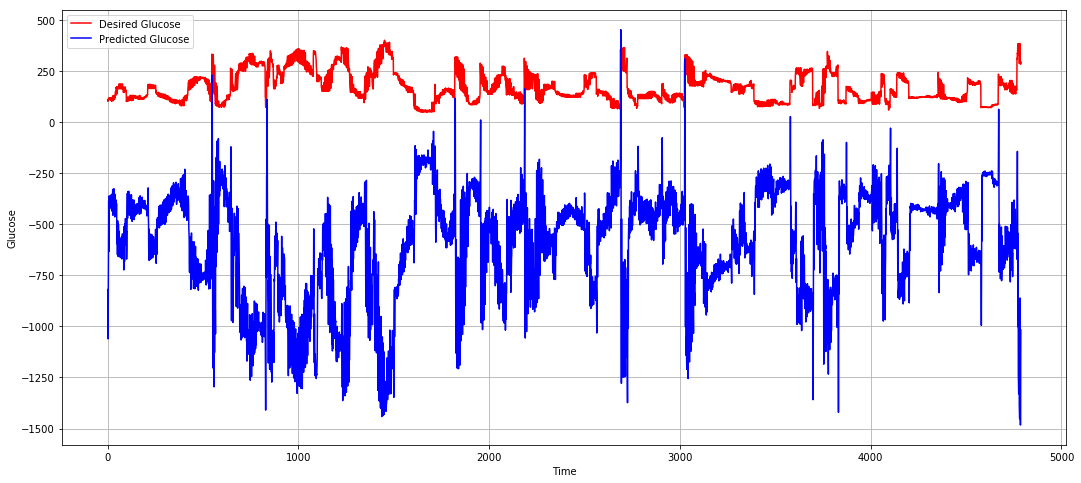

Patient: 164_test.csv, RMSE: 579.6259578295283



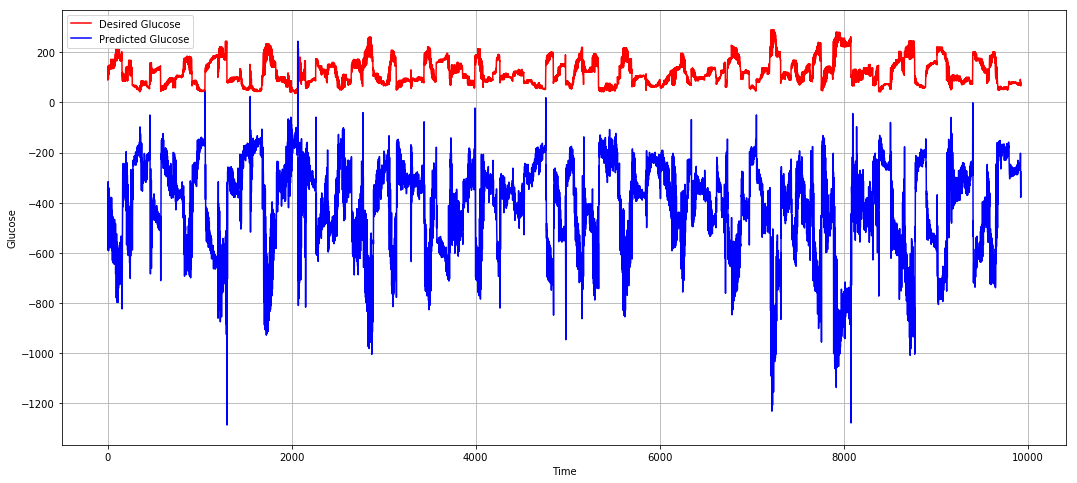

Patient: 172_test.csv, RMSE: 669.3428301656966



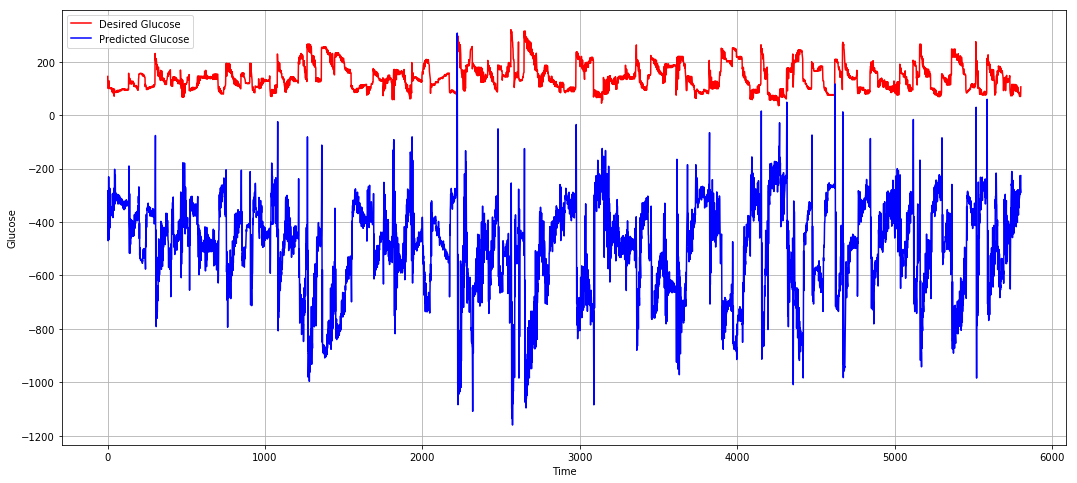

Patient: 118_test.csv, RMSE: 900.052672607869



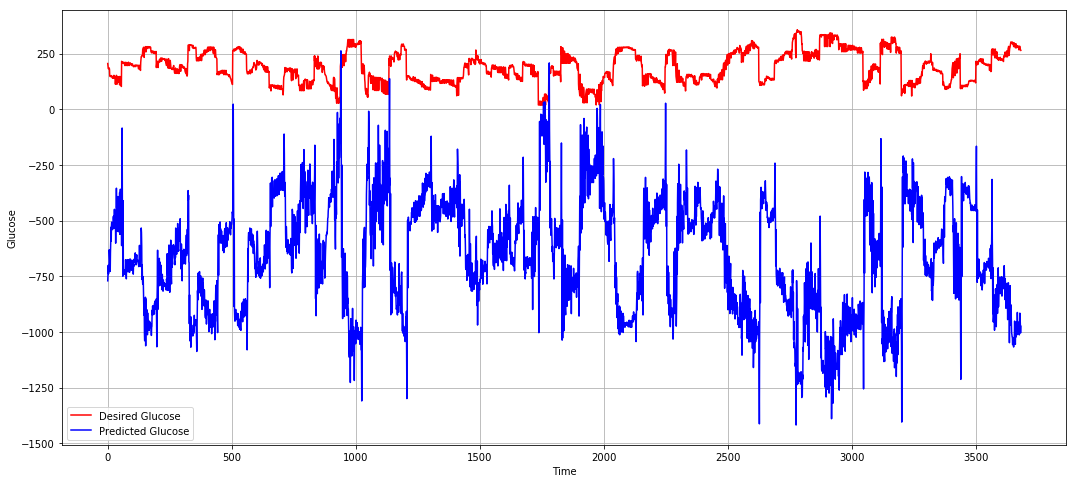

Patient: 108_test.csv, RMSE: 715.681015085537



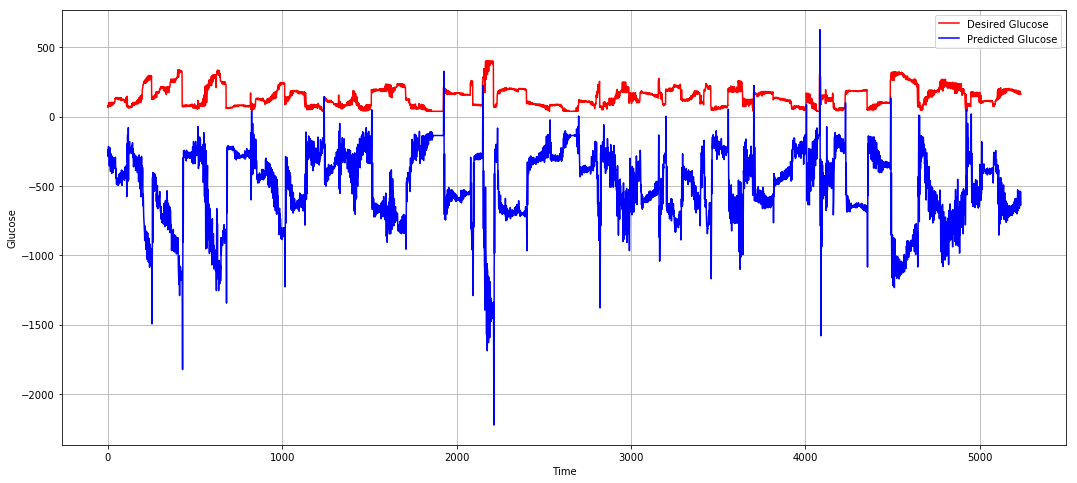

Patient: 150_test.csv, RMSE: 643.6961209344713



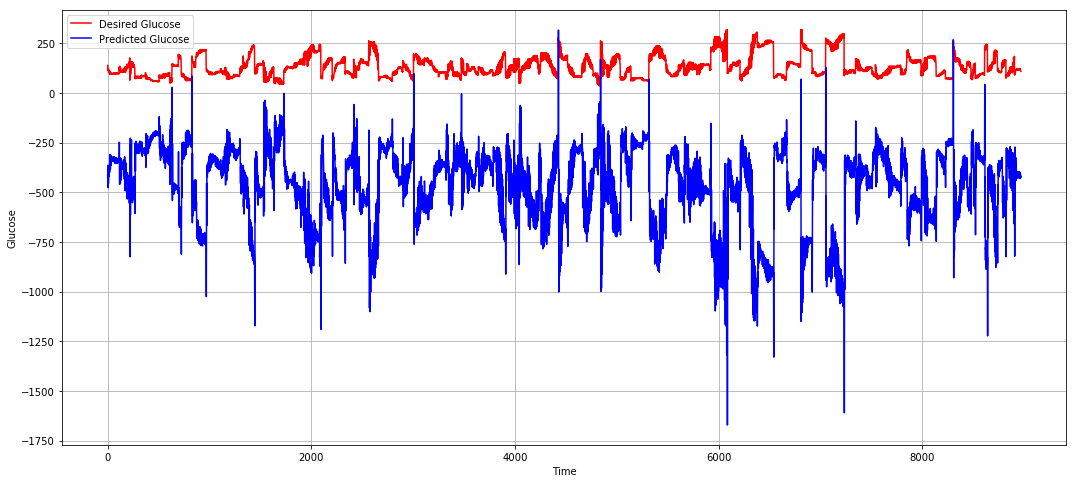

Patient: 109_test.csv, RMSE: 796.1085407398836



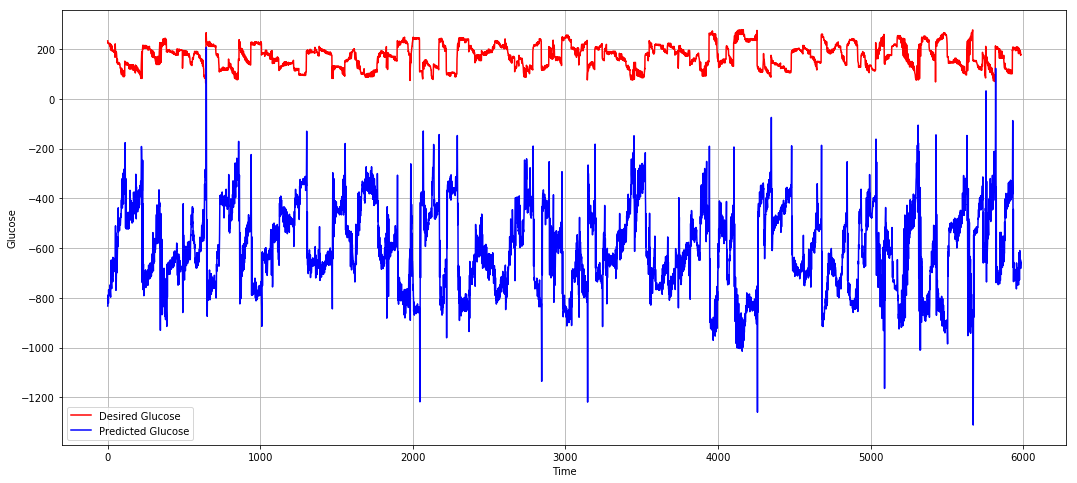

Patient: 174_test.csv, RMSE: 724.41614828763



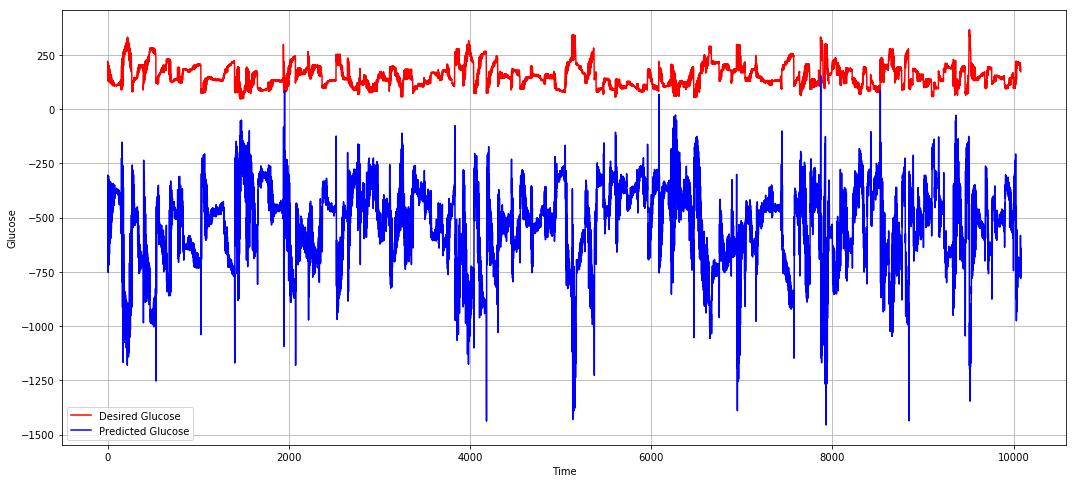

Patient: 160_test.csv, RMSE: 834.7573511672972



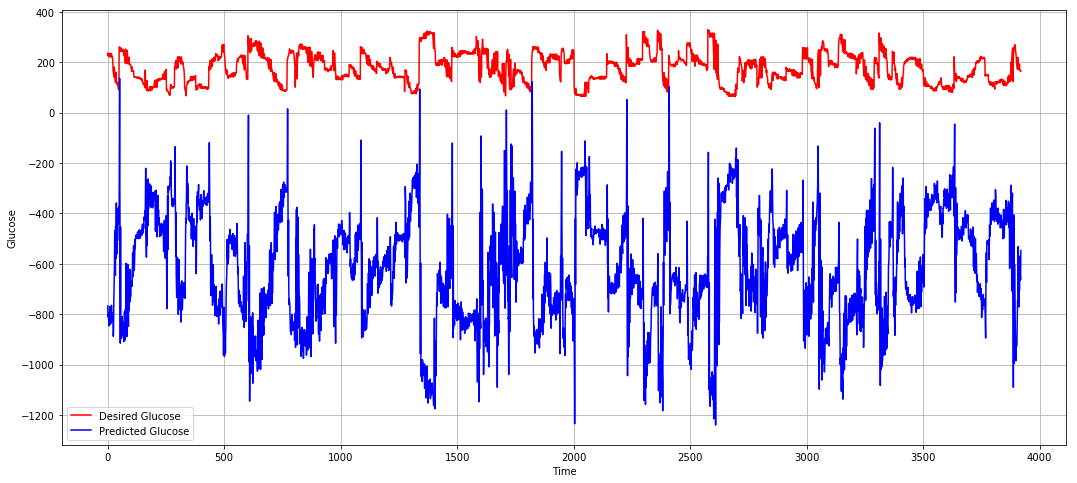

Patient: 100_test.csv, RMSE: 886.422753452027



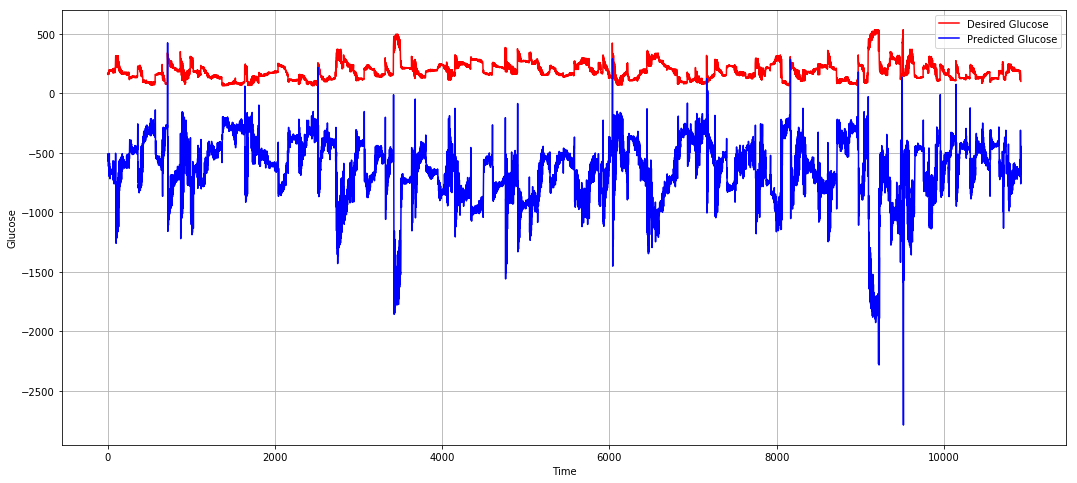

Patient: 178_test.csv, RMSE: 841.0384018015245



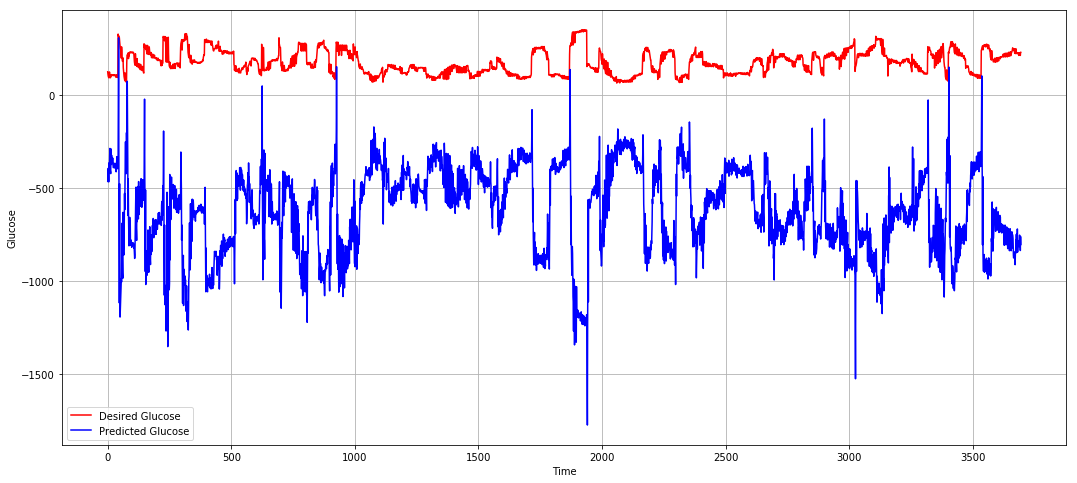

Patient: 138_test.csv, RMSE: 941.4569169881032



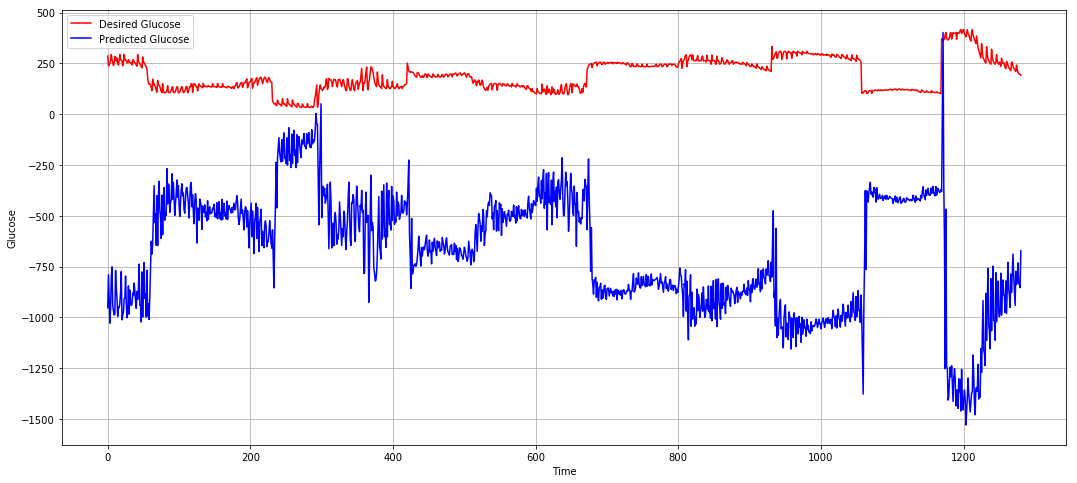

Patient: 117_test.csv, RMSE: 882.7545141582652



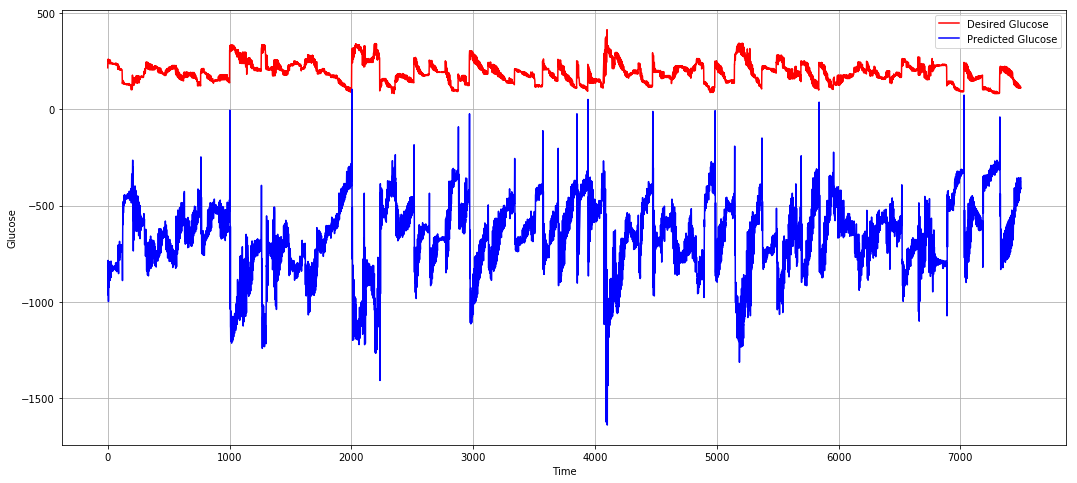

Patient: 133_test.csv, RMSE: 701.2978953098034



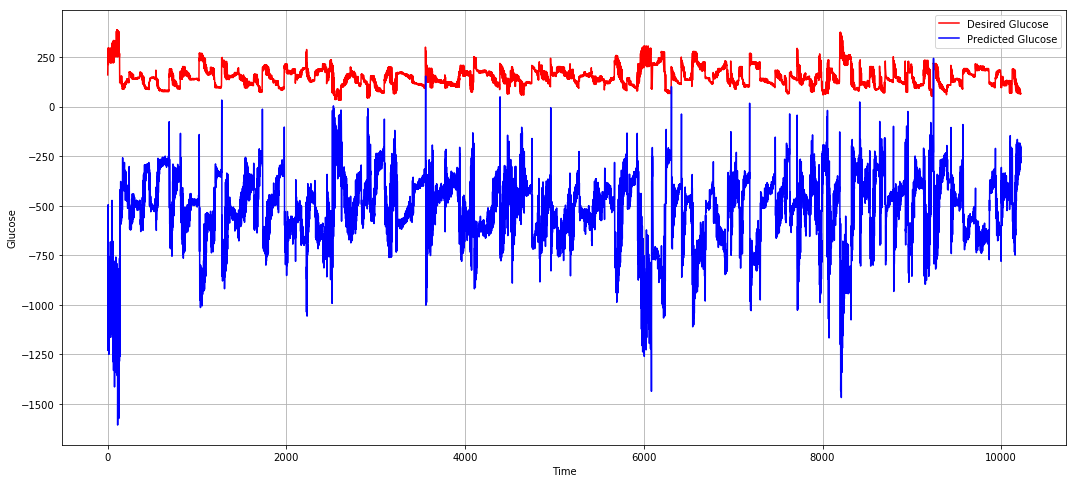

Patient: 147_test.csv, RMSE: 852.4010367272905



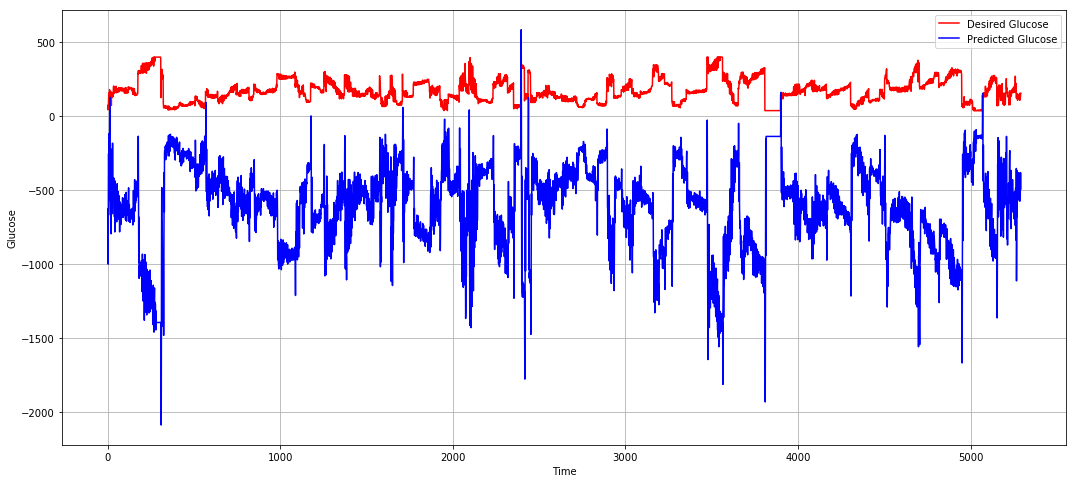

Patient: 132_test.csv, RMSE: 701.662313938032



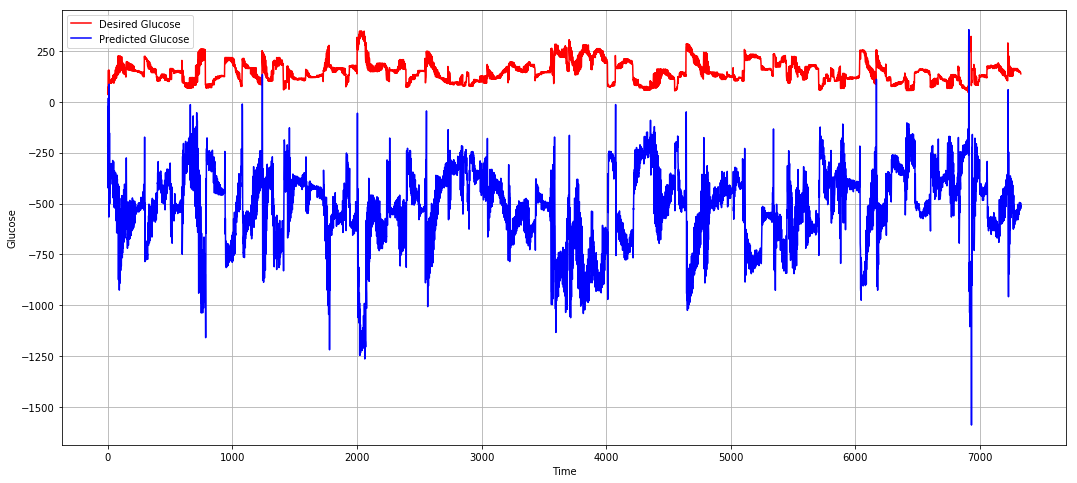

Patient: 121_test.csv, RMSE: 944.0170331033457



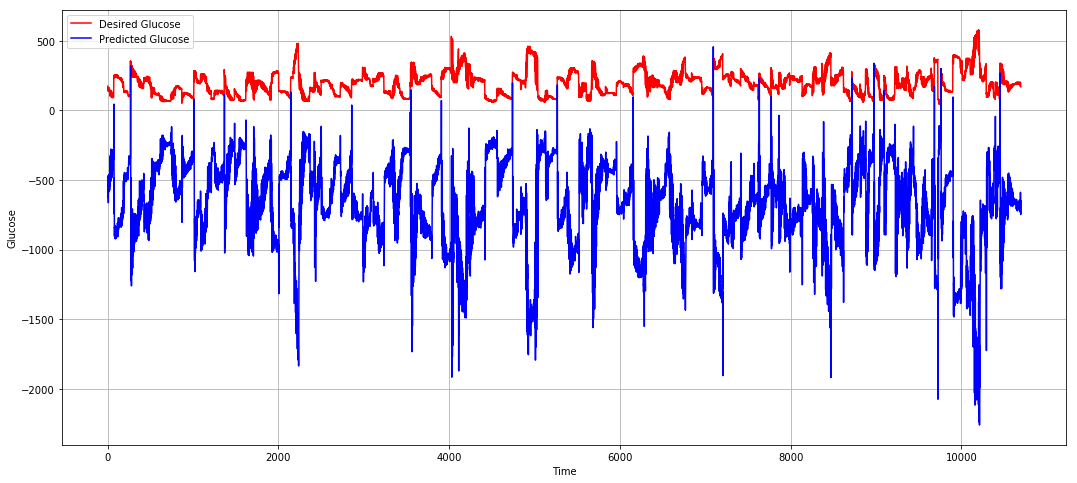

Patient: 142_test.csv, RMSE: 803.5146055708367



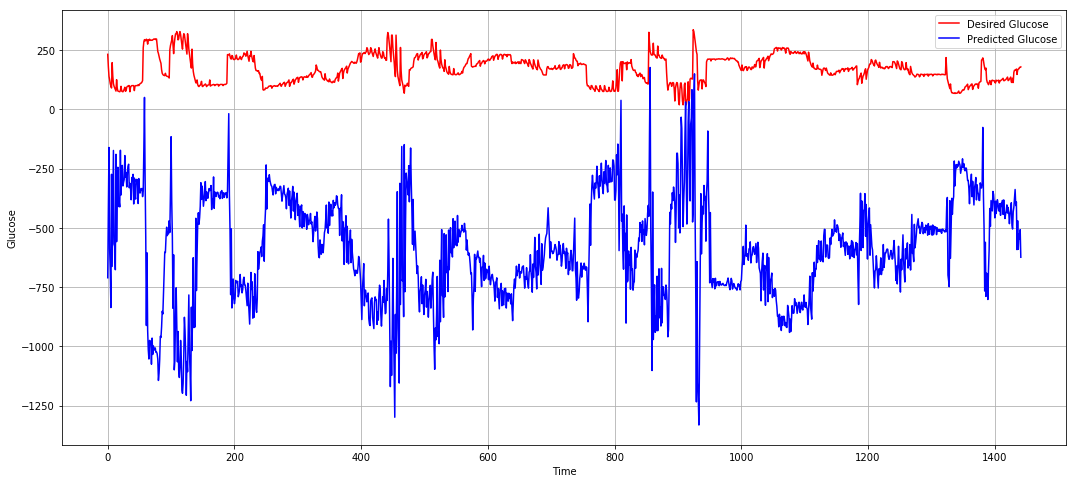

Patient: 162_test.csv, RMSE: 790.5153291067967



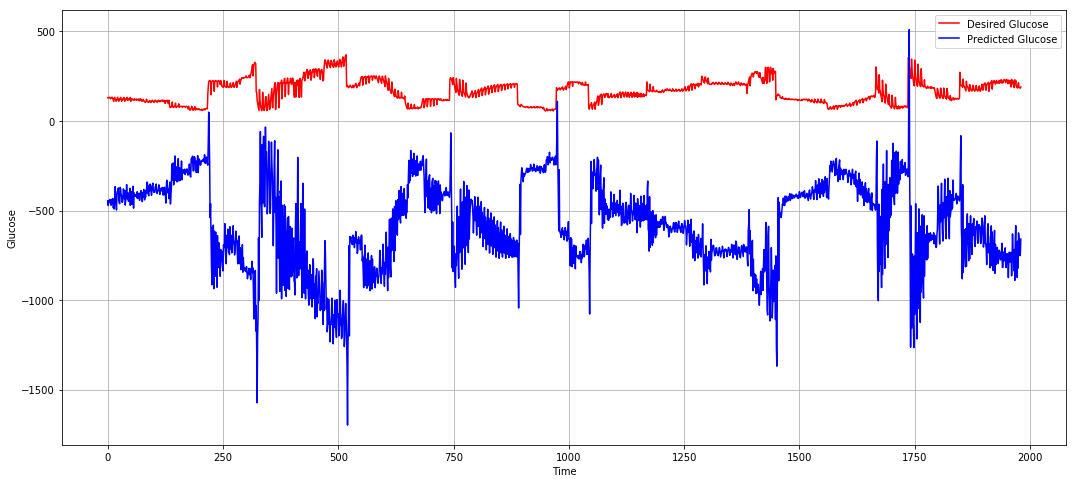

Patient: 173_test.csv, RMSE: 815.5740932495814



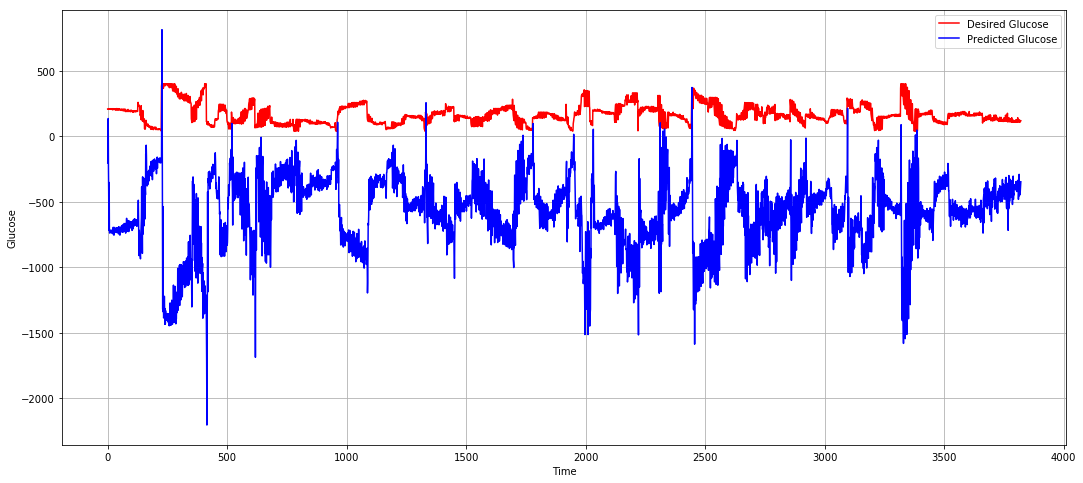

Patient: 149_test.csv, RMSE: 835.264753975487



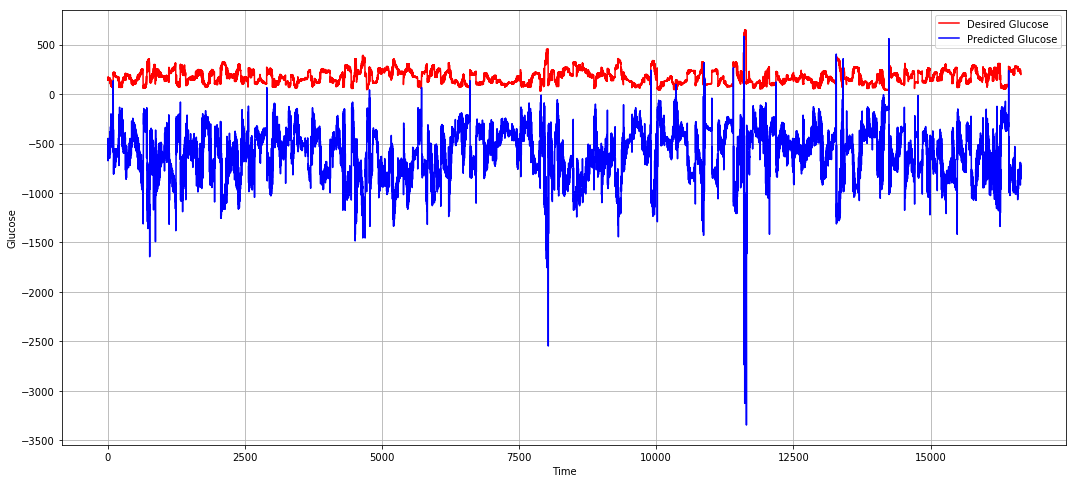

Patient: 136_test.csv, RMSE: 862.1829722902124



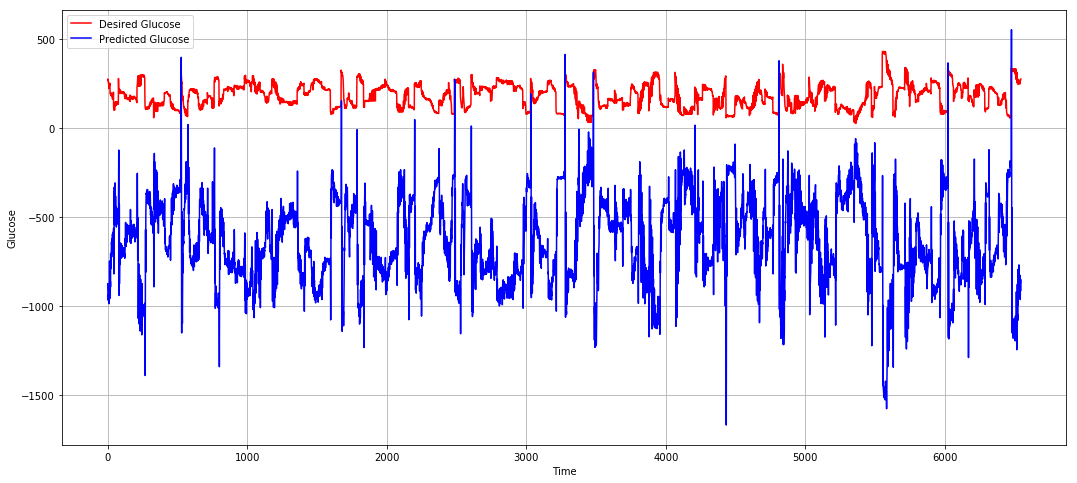

Patient: 139_test.csv, RMSE: 606.0847779118113



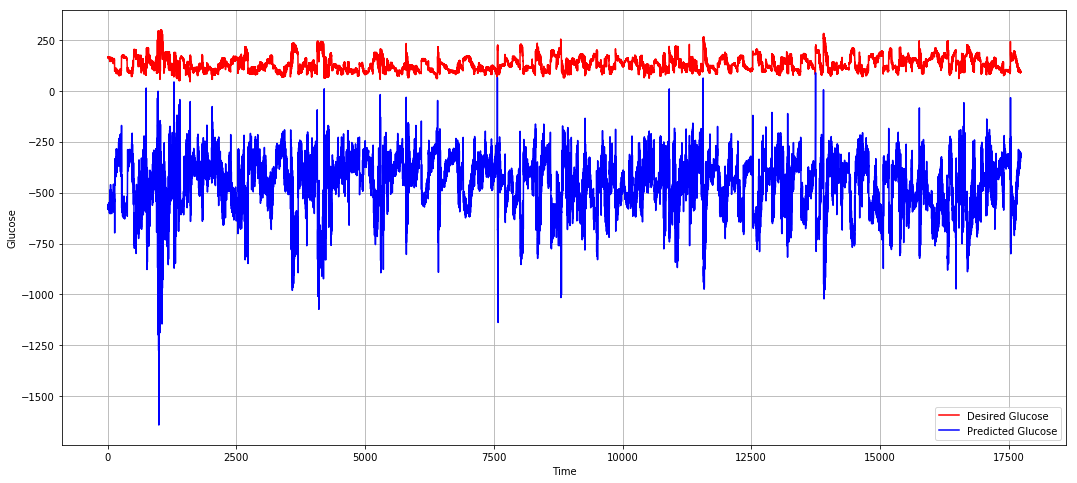

Patient: 180_test.csv, RMSE: 792.6034052026682



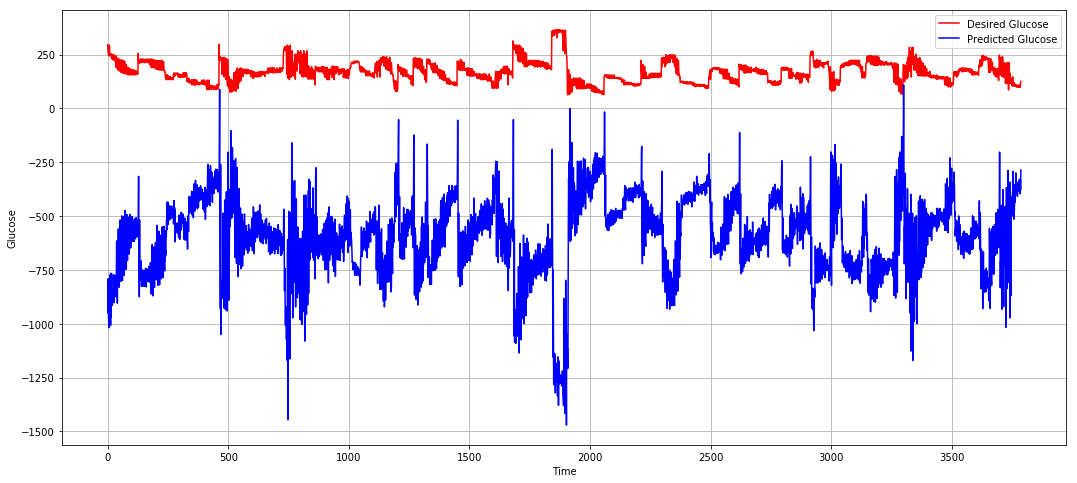

In [ ]:
# Compute mse:
#mse = sess.run(tf.reduce_mean(tf.square(prediction - y_desired)), feed_dict={x: testData_in, y_desired: testData_out})
predictedList=[]
desiredList=[]

standardDeviation=0

e=[] #(실제값-예측값)^2 이 담길 리스트
rmseList=[] # 테스트케이스별 RMSE 값들이 담길 리스트
for j in range(len(testData_in_list)):
    for i, inputPoint in enumerate(testData_in_list[j]) :
        
        predicted = sess.run(prediction, feed_dict={x: [inputPoint]})
        predictedList.append(predicted[0][0])
        desired = testData_out_list[j][i][0]
        desiredList.append(desired)
        
        e.append( math.pow((predicted[0][0]-desired), 2) )
    
    avg = sum(e) / len(e)
    rmse = math.sqrt(avg)
    rmseList.append(rmse)
    
    
    if(j< len(testFileName)):     
        print("Patient: "+str(testFileName[j])+", RMSE: "+str(rmse))
    else:
        print("Patient: "+str(gitTestFileName[j - len(testFileName) ])+", RMSE: "+str(rmse))

    print('')
    plt.figure(figsize=(18, 8))
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Glucose")
    plt.plot(desiredList, "r-", label="Desired Glucose");
    plt.plot(predictedList, "b-", label="Predicted Glucose")
    plt.legend()
    plt.show()
    
    #if(j< len(testFileName)):
        #차트 이미지 저장
        #plt.savefig('chartImage/'+str(testFileName[j])+'.png')
    #else:
        #plt.savefig('chartImage/'+str(gitTestFileName[j - len(testFileName) ])+'.png')
        
    
    predictedList=[]
    desiredList=[]
    e=[]

#RMSE의 표준편차 계산 및 출력
mean = sum(rmseList) / len(rmseList)
vsum = 0
count=0
for xx in rmseList:
    vsum = vsum+(xx-mean)**2
    var = vsum/len(rmseList)
    standardDeviation = math.sqrt(var)

    if(count<len(testFileName)):
        print("Patient: "+str(testFileName[count])+", standardDeviation: "+str(standardDeviation)+", RMSE: "+str(xx))
    else:
        print("Patient: "+str(gitTestFileName[count - len(testFileName) ])+", standardDeviation: "+str(standardDeviation))
    count+=1